In [3]:
import os
from pathlib import Path

import pandas as pd
from dotenv import load_dotenv
from typing import Any

from simulator.simulator import OptionSimulator
from strategies.option_selling import OptionSellingStrategy
from simulator.chain import  OptionChainTimeline

import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [6]:
base_path = Path("data/")
assets = ["BTC", "ETH", "AVAX","NEAR","DOT","ATOM"]
ratios_df_location = base_path/ "ratios.csv"
ratios_df = pd.read_csv(ratios_df_location)
RATIO_AVAX, RATIO_NEAR, RATIO_DOT, RATIO_ATOM = 1.65,1.74,1.31,1.5

asset = "AVAX"# choose the asset under study from from assets
if asset == "BTC":
    asset_df_location = base_path/ "btc_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
elif asset == "ETH":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
elif asset == "AVAX":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.AVAX)))
    asset_df["iv_ratio"] = RATIO_AVAX
elif asset == "NEAR":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.NEAR)))
    asset_df["iv_ratio"] = RATIO_NEAR
elif asset == "DOT":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.DOT)))
    asset_df["iv_ratio"] = RATIO_DOT
elif asset == "ATOM":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.ATOM)))
    asset_df["iv_ratio"] = RATIO_ATOM
chain_timeline = OptionChainTimeline(asset_df)

In [7]:
asset_df

,timestamp,symbol,underlying,type,strike,expiration,open_interest,last_price,bid_price,bid_amount,...,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho,spot_ratio,iv_ratio
0,2021-01-01,ETH-15JAN21-1000-C,ETH,call,1000.0,2021-01-15 08:00:00,504.0,0.0135,0.0110,405.0,...,116.09,SYN.ETH-15JAN21,764.23,0.11825,0.00116,0.29099,-1.17836,0.03091,0.005023,1.65
1,2021-01-01,ETH-15JAN21-1040-C,ETH,call,1040.0,2021-01-15 08:00:00,421.0,0.0135,0.0085,405.0,...,118.71,SYN.ETH-15JAN21,764.23,0.09354,0.00096,0.24561,-1.01709,0.02452,0.005023,1.65
2,2021-01-01,ETH-15JAN21-1080-C,ETH,call,1080.0,2021-01-15 08:00:00,889.0,0.0100,0.0065,400.0,...,121.33,SYN.ETH-15JAN21,764.23,0.07472,0.00079,0.20753,-0.87832,0.01963,0.005023,1.65
3,2021-01-01,ETH-15JAN21-460-P,ETH,put,460.0,2021-01-15 08:00:00,2048.0,0.0015,0.0010,400.0,...,121.51,SYN.ETH-15JAN21,764.23,-0.01762,0.00024,0.06392,-0.27093,-0.00562,0.005023,1.65
4,2021-01-01,ETH-15JAN21-480-P,ETH,put,480.0,2021-01-15 08:00:00,1696.0,0.0020,0.0015,400.0,...,112.95,SYN.ETH-15JAN21,764.23,-0.01983,0.00029,0.07066,-0.27840,-0.00629,0.005023,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726588,2022-06-09,ETH-9JUN22-2000-P,ETH,put,2000.0,2022-06-09 08:00:00,0.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,-0.99776,0.00010,0.00380,-0.24364,-0.01823,0.013649,1.65
3726589,2022-06-09,ETH-9JUN22-2050-C,ETH,call,2050.0,2022-06-09 08:00:00,101.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,0.00025,0.00001,0.00051,-0.00442,0.00000,0.013649,1.65
3726590,2022-06-09,ETH-9JUN22-2050-P,ETH,put,2050.0,2022-06-09 08:00:00,0.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,-0.99975,0.00001,0.00051,-0.03247,-0.01872,0.013649,1.65
3726591,2022-06-09,ETH-9JUN22-2100-C,ETH,call,2100.0,2022-06-09 08:00:00,41.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,0.00002,0.00000,0.00005,-0.00032,0.00000,0.013649,1.65


## Define simulation

In [8]:
strategy = OptionSellingStrategy(
    trade_interval = "30d",
    time_to_maturity = "30d",
    collateralization_ratio = 1.0,
    utilization_ratio = 1.0,
    option_type = "call",
    mode = "moneyness",
    target = -0.1,
    liquidity_delta =1.0,
)

simulator = OptionSimulator(
    chain_timeline = chain_timeline,
    strategies = [strategy],
)

result = simulator.simulate("2021-01-01", "2022-06-10", starting_capital=1000000, time_step="1d")

math domain error
math domain error
math domain error
math domain error


In [9]:
result.action_log_table.head()

,timestamp,step,spot,type,position_type,position_strike,position_maturity,position_size,position_collateral_primary,position_collateral_secondary,position_iv_start,position_price_start,liquidity_change
0,2021-01-01,0,3.838736,sell,call,4.265262,2021-01-31,-260502.418577,0,260502.418577,1.602328,0.541519,-8.589329e+05
1,2021-01-31,30,14.992094,expiration,call,4.265262,2021-01-31,-260502.418577,0,260502.418577,1.602328,0.541519,1.111111e+06
2,2021-01-31,30,14.992094,sell,call,16.657883,2021-03-02,-110861.458781,0,110861.458781,2.198224,3.132369,-1.314786e+06
3,2021-03-02,60,28.645401,expiration,call,16.657883,2021-03-02,-110861.458781,0,110861.458781,2.198224,3.132369,1.846717e+06
4,2021-03-02,60,28.645401,sell,call,31.828223,2021-04-01,-87630.996821,0,87630.996821,2.073057,5.578745,-2.021354e+06


In [10]:
result.metrics

{'Sharpe': 1.066807342082995,
 'Sortino': 1.6716548369238984,
 'CAGR': 0.7315078868820091,
 'MDD': -0.7226728469280014,
 'Calmar': 1.0113523307385373}

In [11]:
result.benchmark_metrics

{'Sharpe': 1.564250078094729,
 'Sortino': 2.768513370180351,
 'CAGR': 2.6259859970272954,
 'MDD': -0.8339109915216055,
 'Calmar': 3.145283195675836}

In [12]:
result.timeline.head()

,timestamp,spot,primary,secondary,liquidity,num_long_positions,num_short_positions,size_long_positions,size_short_positions,collateral_primary,collateral_secondary,total_collaterals,positions_delta,total_delta,positions_value,total_value
0,2021-01-01,3.838736,0.0,36748.323422,141067.110328,0,1,0,260502.418577,0,260502.418577,1000000.0,-131015.208467,166235.533532,-143952.777903,997114.332425
1,2021-01-02,3.48187,0.0,36748.323422,127952.897709,0,1,0,260502.418577,0,260502.418577,907035.647157,-105427.776249,191822.965749,-91670.518822,943318.026043
2,2021-01-03,2.755911,0.0,36748.323422,101275.100671,0,1,0,260502.418577,0,260502.418577,717921.423607,-83142.530961,214108.211037,-64972.443446,754224.080832
3,2021-01-04,3.385132,0.0,36748.323422,124397.93366,0,1,0,260502.418577,0,260502.418577,881835.13061,-124734.483017,172516.258981,-147086.546502,859146.517768
4,2021-01-05,4.031439,0.0,36748.323422,148148.630485,0,1,0,260502.418577,0,260502.418577,1050199.654202,-156308.583687,140942.158311,-255712.092824,942636.191863


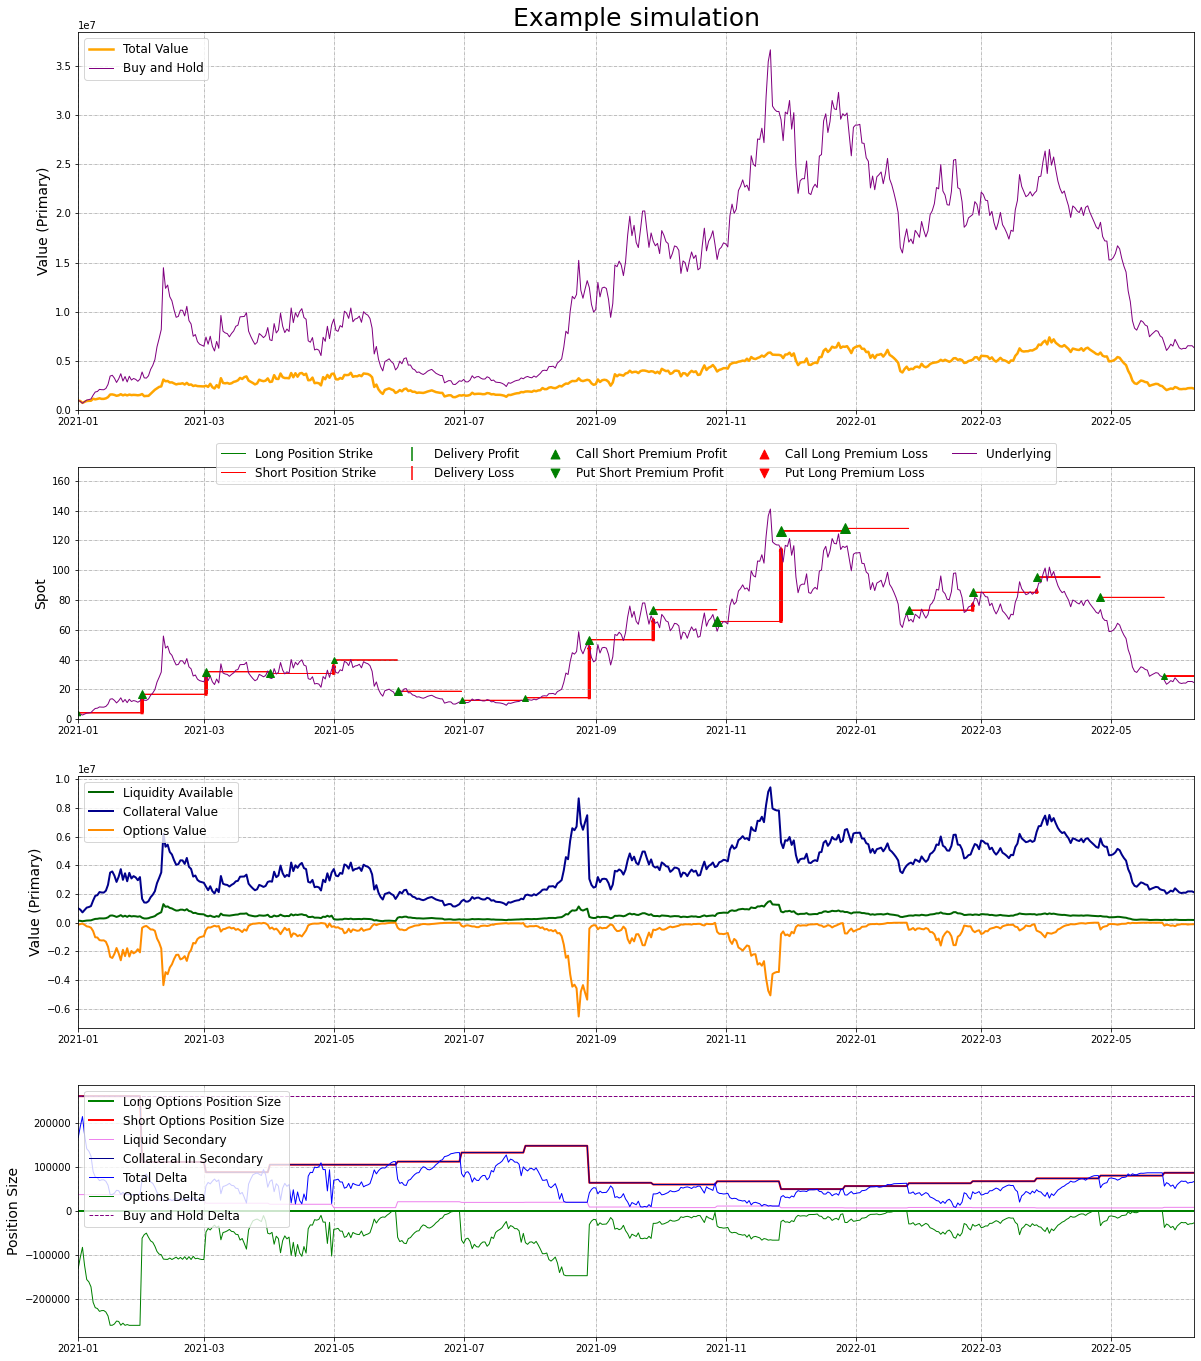

In [13]:
result.plot_simulation("Example simulation")